In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  #necessary, although not directly used!
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_1_no_outliers.csv", index_col=0)

/tmp/ipykernel_9258/1686640375.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We can see that the features of "salary" and "happiness" contain missing values, the latter one only one.

In [2]:
print(base_df.isna().sum())
print(base_df.describe())

score         0
salary       49
happiness     1
Age           0
dtype: int64
            score         salary   happiness         Age
count  980.000000     931.000000  979.000000  980.000000
mean    49.006122  120113.066707   50.573034   49.991837
std     28.695185   37565.880254   29.542343   17.554641
min      0.000000   13799.436887    1.000000   21.000000
25%     23.000000   94149.387805   21.000000   34.000000
50%     50.000000  118633.367538   60.000000   49.000000
75%     74.000000  144899.466421   80.000000   65.000000
max     99.000000  349110.332462  100.000000   80.000000


We are using the IterativeImputer, which uses the data in all features of the dataset in order to impute the missing values. This method takes the other features as inputs and the missing feature column as output, and builds a regressor in order to predict the missing values. This is great, because the correlations between the features are used in order to make the predictions.


In [4]:
# Initialize the IterativeImputer
iterative_imputer = IterativeImputer(max_iter=20, random_state=SEED)

In [5]:
# Apply the imputer to the DataFrame
imputed_array = iterative_imputer.fit_transform(base_df)

In [7]:
# Convert the imputed array back to a DataFrame with the same columns as 'base_df'
imputed_df = pd.DataFrame(imputed_array, columns=base_df.columns)

In [10]:
imputed_df

,score,salary,happiness,Age
0,80.0,141890.771857,61.0,62.0
1,47.0,130053.860492,80.0,71.0
2,56.0,102071.794659,40.0,67.0
3,37.0,90975.540309,21.0,27.0
4,70.0,109558.368794,41.0,77.0
...,...,...,...,...
975,7.0,117026.617736,41.0,63.0
976,26.0,89572.041893,40.0,22.0
977,50.0,120695.809039,41.0,40.0
978,42.0,297158.567626,81.0,79.0


In [11]:
imputed_df.iloc[99]

score            50.000000
salary       349110.332462
happiness       204.717470
Age              25.000000
Name: 99, dtype: float64

Look at our imputed rows:

In [12]:
# Create a copy of 'base_df' to preserve the original dataframe
updated_df = base_df.copy()

# Check if 'salary' is NaN and if so, update 'imputed_salary' with the value from 'imputed_df'
# This step ensures we're only modifying the intended rows and avoids direct modifications that could lead to warnings
updated_df.loc[updated_df['salary'].isna(), 'imputed_salary'] = imputed_df.loc[updated_df[updated_df['salary'].isna()].index, 'salary']

# Replace the NaN values in the 'salary' column directly with the imputed values
# updated_df.loc[updated_df['salary'].isna(), 'salary'] = imputed_df.loc[updated_df[updated_df['salary'].isna()].index, 'salary']


updated_df.loc[updated_df['happiness'].isna(), 'imputed_happiness'] = imputed_df.loc[updated_df[updated_df['happiness'].isna()].index, 'happiness']
# updated_df.loc[updated_df['happiness'].isna(), 'happiness'] = imputed_df.loc[updated_df[updated_df['happiness'].isna()].index, 'happiness']

# Look at the rows where either 'salary' or 'happiness' was NaN
print(updated_df[updated_df['salary'].isna() | updated_df['happiness'].isna()])

     score         salary  happiness  Age  imputed_salary  imputed_happiness
7       21            NaN       20.0   50    81296.916105                NaN
8       11            NaN       20.0   34    79678.658501                NaN
11       3            NaN       20.0   22    78402.324296                NaN
13      56            NaN        1.0   60    65619.851988                NaN
56      30            NaN        1.0   71    67489.894844                NaN
90      67            NaN       20.0   39   148860.167534                NaN
100     50  349110.332462        NaN   25             NaN               61.0
108      3            NaN        1.0   46   140252.116792                NaN
124     33            NaN        1.0   73   124716.728219                NaN
135     33            NaN        1.0   48   138991.987912                NaN
145     35            NaN       20.0   25   123354.451833                NaN
169      5            NaN        1.0   73   113925.410722                NaN

Here, we also do an imputation with the SimpleImputer and the mean, and compare the results to those of the IterativeImputer.

In [13]:
simple_imputer=SimpleImputer(strategy='mean')
simple_imputer_train=simple_imputer.fit_transform(base_df)
df_simple_imputed=pd.DataFrame(simple_imputer_train, columns=base_df.columns)
print(df_simple_imputed)

     score         salary  happiness   Age
0     80.0  141890.771857       61.0  62.0
1     47.0  130053.860492       80.0  71.0
2     56.0  102071.794659       40.0  67.0
3     37.0   90975.540309       21.0  27.0
4     70.0  109558.368794       41.0  77.0
..     ...            ...        ...   ...
975    7.0  117026.617736       41.0  63.0
976   26.0   89572.041893       40.0  22.0
977   50.0  120695.809039       41.0  40.0
978   42.0  297158.567626       81.0  79.0
979   51.0  122615.655631       60.0  34.0

[980 rows x 4 columns]


In [14]:
# Create a copy of 'base_df' to preserve the original dataframe
updated_simple_df = base_df.copy()

# Check if 'salary' is NaN and if so, update 'imputed_salary' with the value from 'imputed_df'
# This step ensures we're only modifying the intended rows and avoids direct modifications that could lead to warnings
updated_simple_df.loc[updated_simple_df['salary'].isna(), 'imputed_salary'] = df_simple_imputed.loc[updated_simple_df[updated_simple_df['salary'].isna()].index, 'salary']

# Replace the NaN values in the 'salary' column directly with the imputed values
# updated_df.loc[updated_df['salary'].isna(), 'salary'] = imputed_df.loc[updated_df[updated_df['salary'].isna()].index, 'salary']


updated_simple_df.loc[updated_simple_df['happiness'].isna(), 'imputed_happiness'] = df_simple_imputed.loc[updated_simple_df[updated_simple_df['happiness'].isna()].index, 'happiness']
# updated_df.loc[updated_df['happiness'].isna(), 'happiness'] = imputed_df.loc[updated_df[updated_df['happiness'].isna()].index, 'happiness']

# Look at the rows where either 'salary' or 'happiness' was NaN
print(updated_simple_df[updated_simple_df['salary'].isna() | updated_simple_df['happiness'].isna()])

     score         salary  happiness  Age  imputed_salary  imputed_happiness
7       21            NaN       20.0   50   120113.066707                NaN
8       11            NaN       20.0   34   120113.066707                NaN
11       3            NaN       20.0   22   120113.066707                NaN
13      56            NaN        1.0   60   120113.066707                NaN
56      30            NaN        1.0   71    67489.894844                NaN
90      67            NaN       20.0   39   148860.167534                NaN
100     50  349110.332462        NaN   25             NaN               61.0
108      3            NaN        1.0   46   140252.116792                NaN
124     33            NaN        1.0   73   124716.728219                NaN
135     33            NaN        1.0   48   138991.987912                NaN
145     35            NaN       20.0   25   123354.451833                NaN
169      5            NaN        1.0   73   113925.410722                NaN

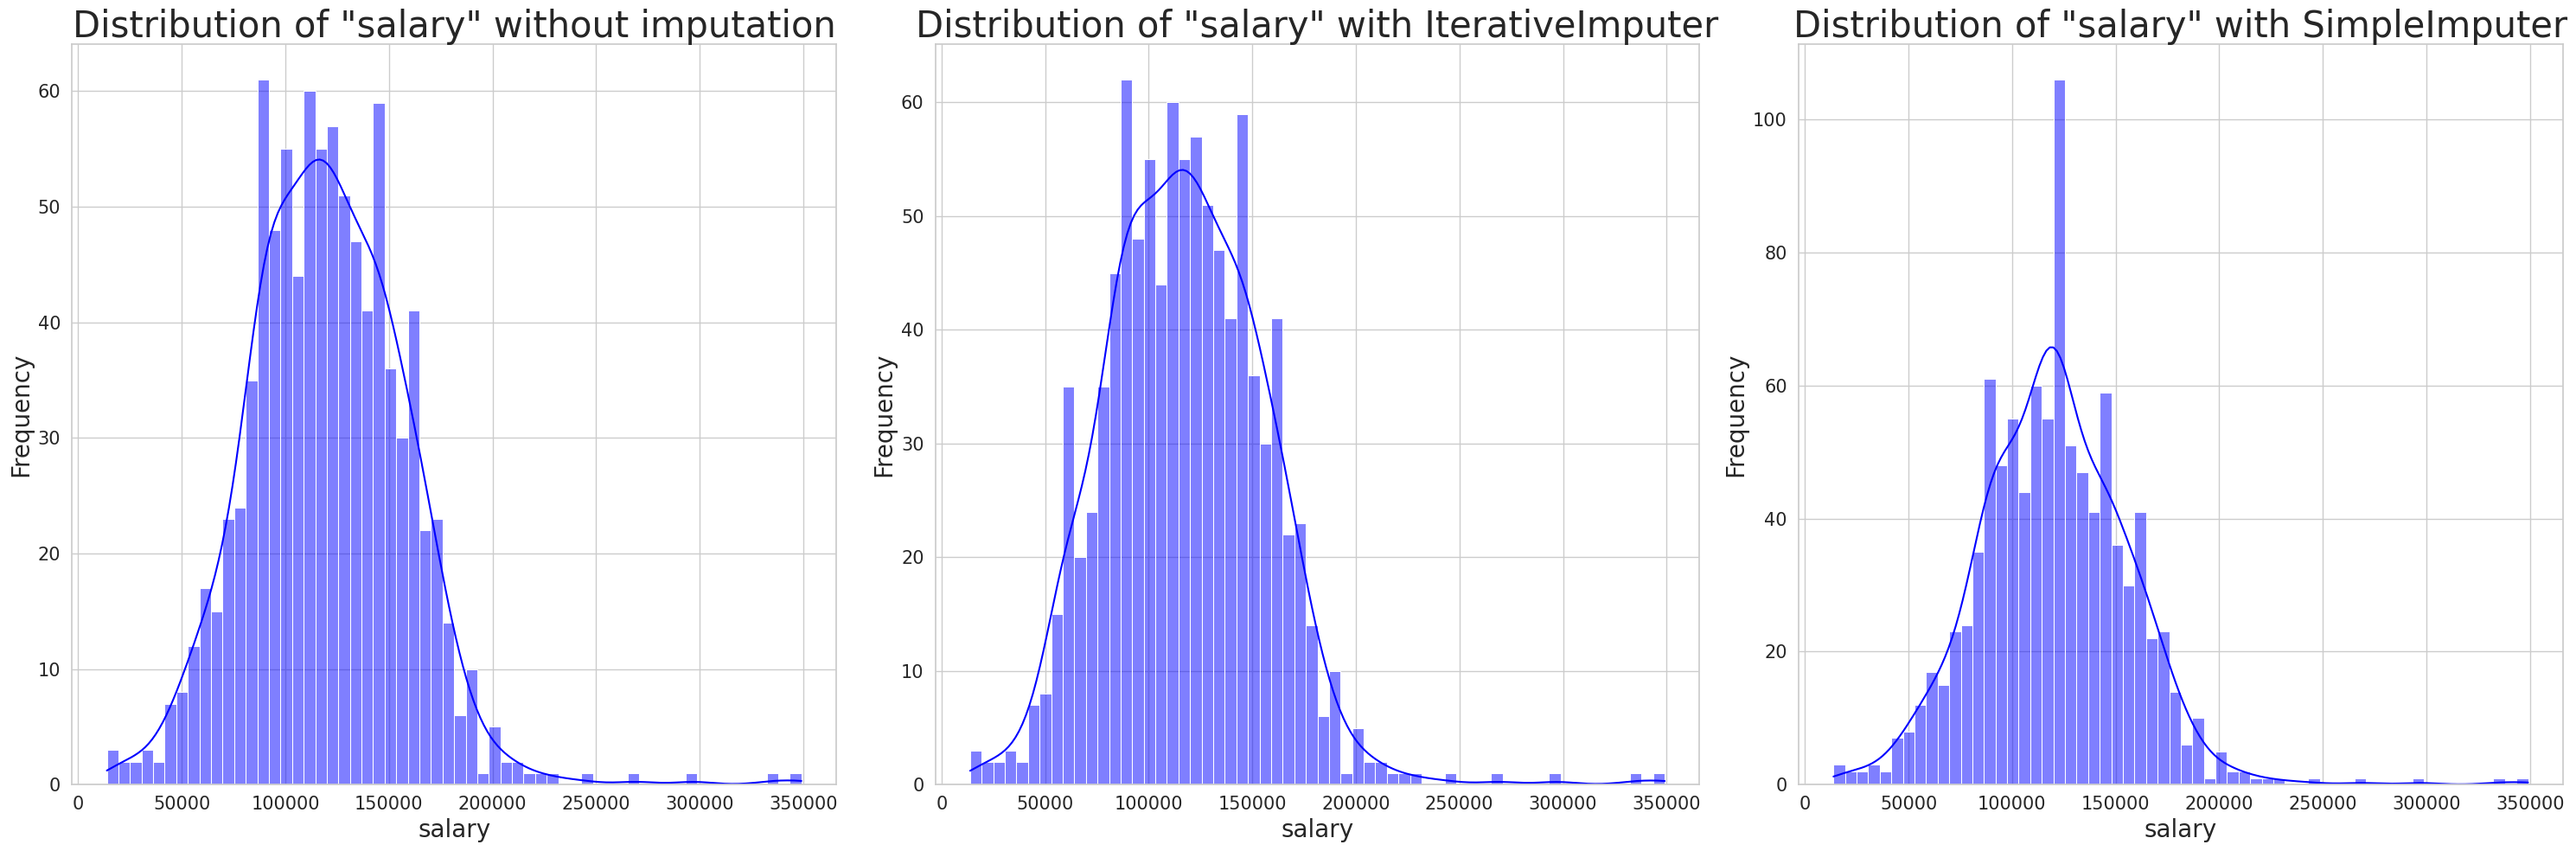

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))

# First row
plt.subplot(1, 3, 1)
sns.histplot(base_df["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary" without imputation', fontsize=30)
plt.xlabel(f'salary', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 3, 2)
sns.histplot(imputed_df["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary" with IterativeImputer', fontsize=30)
plt.xlabel(f'salary', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 3, 3)
sns.histplot(df_simple_imputed["salary"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "salary" with SimpleImputer', fontsize=30)
plt.xlabel(f'salary', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

These images show the distributions after the imputations, on the first row with the IterativeImputer, in the second row with the SimpleImputer. The imputed value for happiness from the IterativeImputer is very high, which can be explained because of the corresponding high salary value of the row. There is a high correlation between those two features, which explains, why the Imputer predicted this high value. However, we assume from domain knowledge that the value of happiness can´t surpass 100, which is why we are going to change this value to 100 in the next cell.

The IterativeImputer performs better, matching the normal distribution of the "salary" feature.

In [16]:
max_index = imputed_df["happiness"].idxmax()
imputed_df.loc[max_index, "happiness"] = 100
print(imputed_df.loc[max_index])

score            50.000000
salary       349110.332462
happiness       100.000000
Age              25.000000
Name: 99, dtype: float64


In [17]:
imputed_df.to_csv("data_1_imputed.csv")

In [18]:
print(imputed_df)

     score         salary  happiness   Age
0     80.0  141890.771857       61.0  62.0
1     47.0  130053.860492       80.0  71.0
2     56.0  102071.794659       40.0  67.0
3     37.0   90975.540309       21.0  27.0
4     70.0  109558.368794       41.0  77.0
..     ...            ...        ...   ...
975    7.0  117026.617736       41.0  63.0
976   26.0   89572.041893       40.0  22.0
977   50.0  120695.809039       41.0  40.0
978   42.0  297158.567626       81.0  79.0
979   51.0  122615.655631       60.0  34.0

[980 rows x 4 columns]
